In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
print(os.listdir("C:\\Users\\ajith\\Desktop\\Capstone Project\\pyparrot\\leapGestRecog\\leapGestRecog"))

# Any results you write to the current directory are saved as output.

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']


In [10]:
import os
import numpy as np
from PIL import Image
import matplotlib.image as mpimg 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import IPython.display
path="C:\\Users\\ajith\\Desktop\\Capstone Project\\pyparrot\\leapGestRecog\\leapGestRecog"
folders=os.listdir(path)
folders=set(folders)

import codecs
import json


different_classes=os.listdir(path+'/'+'00')
different_classes=set(different_classes)




print("The different classes that exist in this dataset are:")
print(different_classes,sep='\n')

The different classes that exist in this dataset are:
{'01_palm', '03_fist', '09_c', '10_down', '02_l', '06_index', '07_ok', '04_fist_moved', '08_palm_moved', '05_thumb'}


In [11]:
classes=dict()
names_of_classes=dict()
for i in different_classes:
    classes[int(i.split('_')[0])]='_'.join(i.split('_')[1:])
    names_of_classes['_'.join(i.split('_')[1:])]=int(i.split('_')[0])

print(classes)

{1: 'palm', 3: 'fist', 9: 'c', 10: 'down', 2: 'l', 6: 'index', 7: 'ok', 4: 'fist_moved', 8: 'palm_moved', 5: 'thumb'}


In [12]:
x=[]
z=[]
y=[]#converting the image to black and white
threshold=200
import cv2


for i in folders:
    print('***',i,'***')
    subject=path+'/'+i
    subdir=os.listdir(subject)
    subdir=set(subdir)
    for j in subdir:
        print(j)
        images=os.listdir(subject+'/'+j)
        for k in images:
            results=dict()
            results['y']=j.split('_')[0]
            img = cv2.imread(subject+'/'+j+'/'+k,0)
            img=cv2.resize(img,(int(160),int(60)))
            
            ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            imgD=np.asarray(img,dtype=np.float64)
            z.append(imgD)
            imgf=np.asarray(imgf,dtype=np.float64)
            x.append(imgf)
            y.append(int(j.split('_')[0]))
            results['x']=imgf

print(list(set(y)))
        
# import pandas as pd 
# df=pd.DataFrame({'x':x,'y':y})
# df.to_csv('results.csv',index=False)

*** 05 ***
01_palm
03_fist
09_c
10_down
02_l
06_index
07_ok
04_fist_moved
08_palm_moved
05_thumb
*** 02 ***
01_palm
03_fist
09_c
10_down
02_l
06_index
07_ok
04_fist_moved
08_palm_moved
05_thumb
*** 07 ***
01_palm
03_fist
09_c
10_down
02_l
06_index
07_ok
04_fist_moved
08_palm_moved
05_thumb
*** 04 ***
01_palm
03_fist
09_c
10_down
02_l
06_index
07_ok
04_fist_moved
08_palm_moved
05_thumb
*** 06 ***
01_palm
03_fist
09_c
10_down
02_l
06_index
07_ok
04_fist_moved
08_palm_moved
05_thumb
*** 09 ***
01_palm
03_fist
09_c
10_down
02_l
06_index
07_ok
04_fist_moved
08_palm_moved
05_thumb
*** 08 ***
01_palm
03_fist
09_c
10_down
02_l
06_index
07_ok
04_fist_moved
08_palm_moved
05_thumb
*** 03 ***
01_palm
03_fist
09_c
10_down
02_l
06_index
07_ok
04_fist_moved
08_palm_moved
05_thumb
*** 01 ***
01_palm
03_fist
09_c
10_down
02_l
06_index
07_ok
04_fist_moved
08_palm_moved
05_thumb
*** 00 ***
01_palm
03_fist
09_c
10_down
02_l
06_index
07_ok
04_fist_moved
08_palm_moved
05_thumb
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10

Class Label: 1


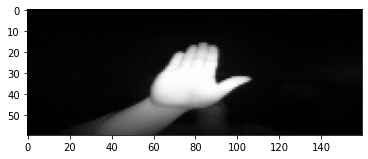

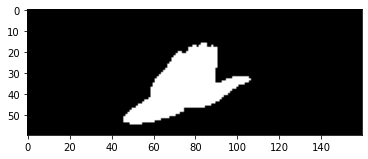

Class Label: 2


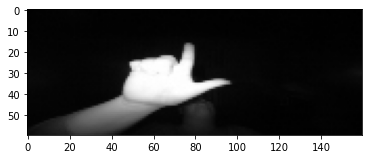

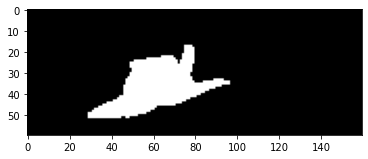

Class Label: 3


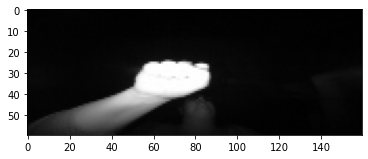

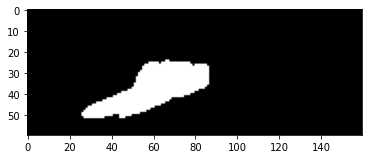

Class Label: 4


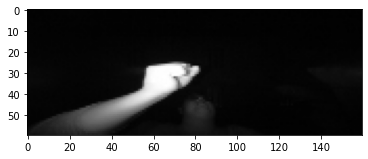

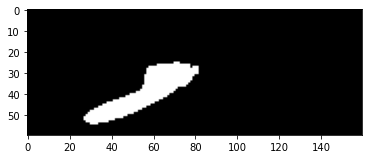

Class Label: 5


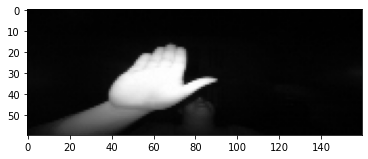

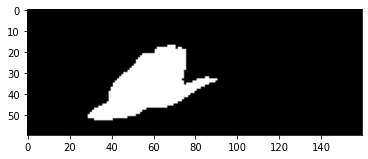

Class Label: 6


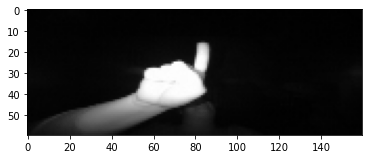

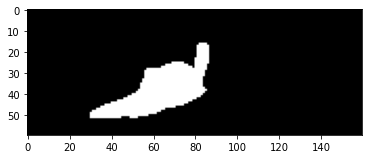

Class Label: 7


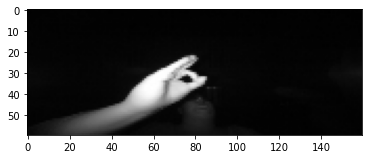

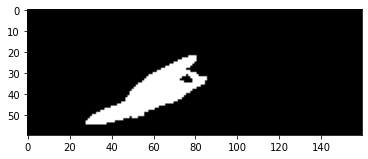

Class Label: 8


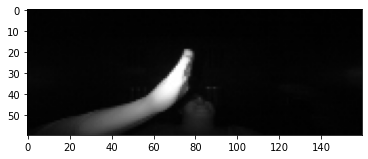

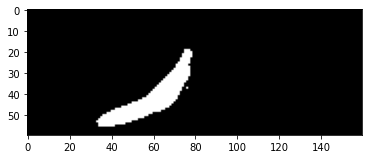

Class Label: 9


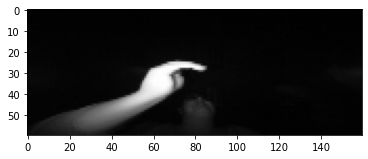

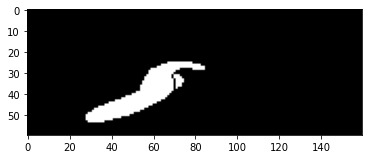

Class Label: 10


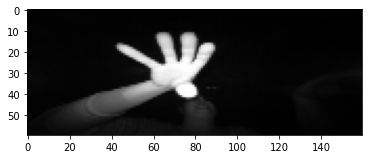

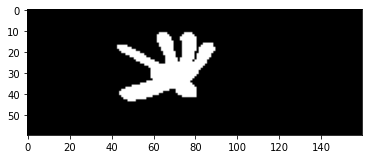

In [13]:
#sample black and white image from each class
l = []
list_names = []
for i in range(10):
    l.append(0)
for i in range(len(x)):
    if(l[y[i] - 1] == 0):
        l[y[i] - 1] = i
        if(len(np.unique(l)) == 10):
            break
for i in range(len(l)):
    %matplotlib inline
    print("Class Label: " + str(i + 1))
    plt.imshow(np.asarray(z[l[i]]), cmap  =cm.gray)
    plt.show()
    plt.imshow(np.asarray(x[l[i]]), cmap = cm.gray)     
    plt.show()
    

In [14]:
x=np.array(x)
y=np.array(y)
y = y.reshape(len(x), 1)
print(x.shape)
print(y.shape)
print(max(y),min(y))

(20000, 60, 160)
(20000, 1)
[10] [1]


In [15]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [16]:
import keras
from tensorflow.keras.utils import to_categorical
def one_hot_encoded(y):
    p=list(np.unique(y))
    dictionary=dict()
    final_result=[]
    for i in range(len(p)):
        dictionary[p[i]]=i
    for i in y:
        actual=[0 for j in range(len(p))]
        actual[dictionary[i[0]]]=1
        final_result.append(actual)
    return np.array(final_result)
        
        
    
y_data = one_hot_encoded(y)
print(y_data[0])
print(type(y_data))

[1 0 0 0 0 0 0 0 0 0]
<class 'numpy.ndarray'>


In [17]:
x_data = x.reshape((len(x), 60, 160, 1))

x_data/=255
print(x_data.shape)

(20000, 60, 160, 1)


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [19]:
from keras import layers
from keras import models

In [21]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(60, 160,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [22]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/10
250/250 [==============================] - 30s 119ms/step - loss: 0.3779 - accuracy: 0.8808 - val_loss: 0.0182 - val_accuracy: 0.9960
Epoch 2/10
250/250 [==============================] - 29s 115ms/step - loss: 0.0275 - accuracy: 0.9933 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 3/10
250/250 [==============================] - 32s 129ms/step - loss: 0.0151 - accuracy: 0.9967 - val_loss: 0.0013 - val_accuracy: 0.9995
Epoch 4/10
250/250 [==============================] - 31s 126ms/step - loss: 0.0095 - accuracy: 0.9979 - val_loss: 4.4986e-04 - val_accuracy: 0.9995
Epoch 5/10
250/250 [==============================] - 29s 118ms/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 6/10
250/250 [==============================] - 32s 128ms/step - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.0012 - val_accuracy: 0.9995
Epoch 7/10
250/250 [==============================] - 30s 120ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 2.7249e-05 

In [23]:
model.save('cnn_results.h5')

In [24]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

63/63 [==============================] - 2s 31ms/step - loss: 5.0035e-07 - accuracy: 1.0000
Accuracy:1.0
